# Lab04: Clustering

- MSSV: 1712787
- Họ và tên: Nguyễn Văn Thìn

## Yêu cầu bài tập

**Cách làm bài**


Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm.

Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

**Cách nộp bài**

Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`).

Sau đó, tạo thư mục có tên `MSSV` của bạn (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`) Chép file `Lab04-Clustering.ipynb` vào, rồi nén thư mục `MSSV` này lại và nộp ở link trên moodle.

**Nội dung bài tập**

Trong bài này, bạn sẽ cài đặt 2 thuật toán `k-means` và `k-medois` để gom nhóm dữ liệu. 

## Import thư viện 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Cài đặt thuật toán K-mean

Tính khoảng cách euclid giữa 2 điểm dữ liệu x, y

In [2]:
def euclidianDistance(x, y):
    '''
    Euclidian distance between x, y
    --------
    Return
    d: float
    '''
    #TODO
    return np.sqrt(np.sum(np.power((x - y), 2)))

In [3]:
class k_means:
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.centroids=X[indexes]
            
    def updateCentroids(self, cur_centroids):
        '''        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        
        for c in range(0,self.k):
            prev_centroid = self.centroids[c]
            cur_centroid  = cur_centroids[c]
            #checking if % of difference between old position and new position is more than thresold
            
            #TODO d=?
            
            d = np.sum(abs(cur_centroid - prev_centroid)/prev_centroid * 100.0)
            
            if  d > self.thresold:
                self.has_converged = False
                self.centroids = cur_centroids
            
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    #List of distances between centroid j and data point k
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    #c = the centroid which has minimal distance to data point k
                    c = np.argmin(d_list)
                    
                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #New centroids of each cluster is calculated by mean of all samples closest to it
                
                #TODO (new_centroid=???)
                new_centroid = np.average(samples, axis = 0)
                
                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(self.centroids[j],data[i]))
                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO 
            
            pred.append(np.argmin(d_list))
            
        return np.array(pred)

## Chạy thuật toán 

**Khởi tạo dữ liệu**

Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.

In [4]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

**Hiển thị dữ liệu trên đồ thị**

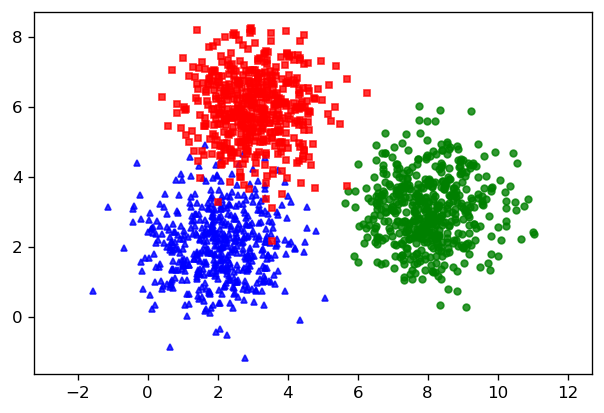

In [5]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

**Gom nhóm dữ liệu bằng thuật toán k-means mà bạn vừa cài đặt**

Centers found by your model:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


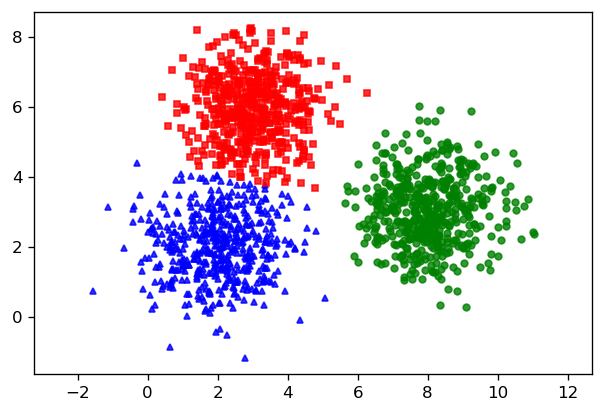

In [6]:
model1=k_means(k=3)
print('Centers found by your model:')
print(model1.fit(X))

pred=model1.predict(X)

visualize(X,pred)


**Thử lại kết quả với scikit learn**

Centers found by scikit-learn:
[[8.02344787 3.061206  ]
 [3.01440769 5.96971345]
 [2.01380571 2.02688416]]


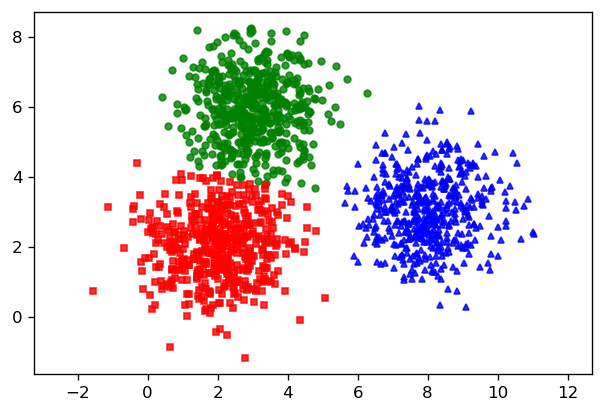

In [7]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

## 2. Cài đặt thuật toán K-medoids

Các bạn cài đặt và thử nghiệm thuật toán K-medois tương tự như phần 1

In [8]:
#K-medois Implementation
#TODO
class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False):
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''
        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.medoids_cost = []
        
    def initMedoids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.medoids = []
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.medoids = X[indexes]
        
        for i in range(0,self.k):
            self.medoids_cost.append(0)
        
    def isConverged(self, new_medoids):
        '''
        Parameters
        ----------
        new_medoids: the recently calculated medoids to be compared with the current medoids stored in the class
        '''
        return set([tuple(x) for x in self.medoids]) == set([tuple(x) for x in new_medoids])
        
    def updateMedoids(self, X, labels):
        '''
        Parameters
        ----------
        labels: a list contains labels of data points
        '''
        self.has_converged = True
        
        #store data points to the current cluster they belong to
        clusters = []
        for i in range(0,self.k):
            cluster = []
            for j in range(len(X)):
                if (labels[j] == i):
                    cluster.append(X[j])
            clusters.append(cluster)
        
        #calculate the new medoids
        new_medoids = []
        for i in range(0, self.k):
            new_medoid = self.medoids[i]
            old_medoids_cost = self.medoids_cost[i]
            for j in range(len(clusters[i])):
                
                #cost of the current data points to be compared with the current optimal cost
                cur_medoids_cost = 0
                for dpoint_index in range(len(clusters[i])):
                    cur_medoids_cost += euclidianDistance(clusters[i][j], clusters[i][dpoint_index])
                
                #if current cost is less than current optimal cost
                #make the current data point new medoid of the cluster
                if cur_medoids_cost < old_medoids_cost:
                    new_medoid = clusters[i][j]
                    old_medoids_cost = cur_medoids_cost
            
            #get out of the loops
            #now we have the optimal medoid of the current cluster
            new_medoids.append(new_medoid)
        
        #if not converged yet, accept the new medoids
        if not self.isConverged(new_medoids):
            self.medoids = new_medoids
            self.has_converged = False
    
    def fit(self, X):
        '''
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster medoids
        self.initMedoids(X)
        
        for i in range(self.max_iter):
            
            #labels for this iteration
            cur_labels = []
            for medoid in range(0,self.k):
                
                #dissimilarity cost of the current cluster
                self.medoids_cost[medoid] = 0
                for k in range(len(X)):
                    
                    #distances from a data point to each of the medoids
                    d_list = []                    
                    for j in range(0,self.k):
                        d_list.append(euclidianDistance(self.medoids[j], X[k]))
                    
                    #data points' labels is the medoid which has minimal distance to it
                    cur_labels.append(d_list.index(min(d_list)))
                    
                    self.medoids_cost[medoid] += min(d_list)
                                
            self.updateMedoids(X, cur_labels)
            
            if self.has_converged:
                break
        #each cluster represented by its medoids
        return np.array(self.medoids)

        
    def predict(self,data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between medoids and data sample
            d_list = []
            for j in range(len(self.medoids)):
                
                # Calculate distances between current data sample and medoid (using euclidian distance) 
                # Store to d_list
                d_list.append(euclidianDistance(self.medoids[j],data[i]))
                
            # Store the Cluster has minimal distance between its medoid and current data sample to pred            
            pred.append(d_list.index(min(d_list)))
            
        return np.array(pred)

**Gom nhóm dữ liệu bằng thuật toán k-medoids**

Centers found by your model:
[[7.93224207 3.0213355 ]
 [2.98493437 5.97312308]
 [1.98413249 2.04159709]]


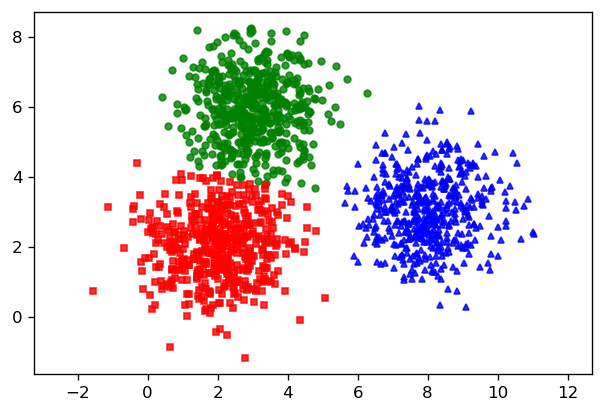

In [9]:
model1=k_medoids(k=3)
print('Centers found by your model:')
print(model1.fit(X))

pred = model1.predict(X)

visualize(X,pred)

**Thử lại với sklearn_extra**

In [10]:
from sklearn_extra.cluster import KMedoids
model4 = KMedoids(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model4.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

#Em không tìm ra được hàm KMedoids trong thư viện sklearn_extra để so sánh với model trên

ModuleNotFoundError: No module named 'sklearn_extra'

**Nêu điểm khác biệt giữa thuật toán K-means và K-medoids:**

TODO:

**K-means:**
+ Điểm trung tâm là Centroid thường không thuộc tập điểm dữ liệu và được tính bằng trung bình giá trị của các điểm dữ liệu trong mỗi cụm cho tới khi tính được Centroid tối ưu nhất  

**K-medoids:**
+ Điểm trung tâm là Medoid là một điểm dữ liệu và được tính bằng cách hoán vị cặp (medoid,datapoint) trong mỗi cụm cho tới khi chọn được Medoid tối ưu nhất

**Thời gian chạy thuật toán:**
+ K-medoid tốn nhiều chi phí bộ nhớ hơn so với K-mean bới K-Medoid phải tìm và duyệt hết các điểm dữ liệu 

# 3. Sử dụng thuật toán gom cụm trên tập dữ liệu Iris 

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

In [12]:
X = []
X = iris.data
y = iris.target

Text(0, 0.5, 'Pepal Width')

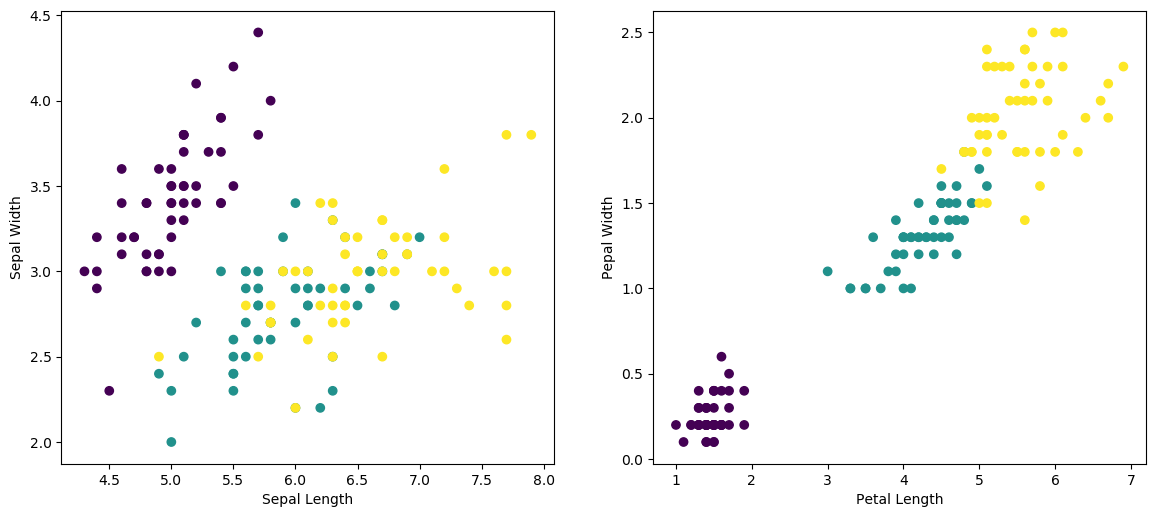

In [13]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Pepal Width')

**Nhận xét:**

TODO:

**Sự phân phối điểm dữ liệu**

+ Sepal thì các điểm dữ liệu khá rời rạc nên phân cụm không rõ rệt
+ Petal có xu hướng tăng lên tuyến tính (Petal Width là một hàm tuyến tính của Petal Length) làm cho sự phân cụm dữ liệu rõ rệt hơn

In [14]:
D=X[:,2:]
cluster_num = 3
model=k_means(k=cluster_num)
centers = model.fit(D)
print(centers)

[[5.59583333 2.0375    ]
 [4.26923077 1.34230769]
 [1.462      0.246     ]]


Text(0.5, 1.0, 'Predicted')

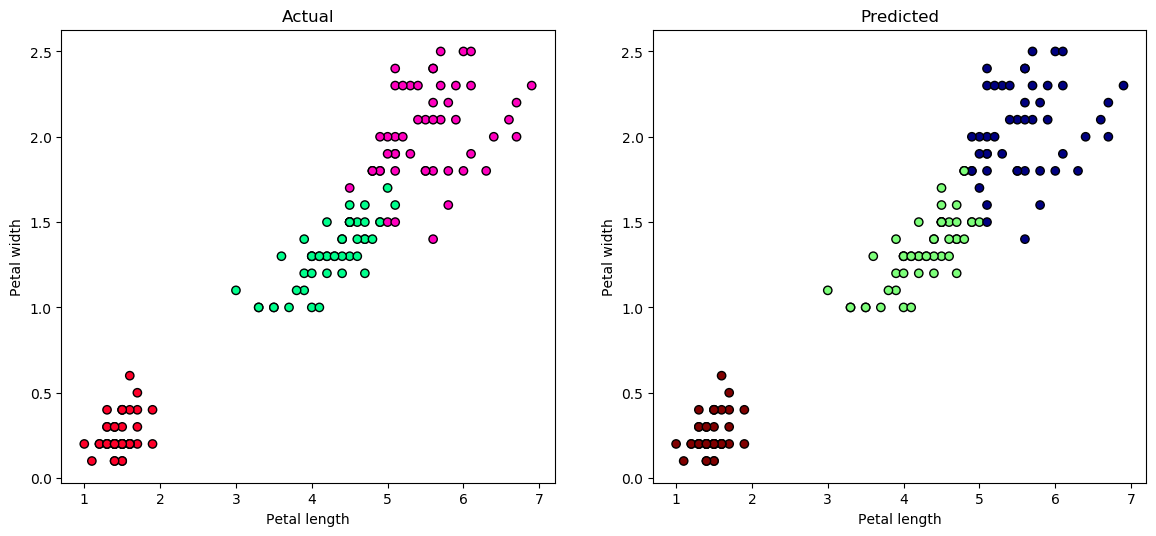

In [15]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

TODO:
- Sự phân cụm dữ liệu rõ rệt chỉ lẫn lộn vài điểm

 
  


### Thực hiện tương tự với thuật toán K-medois

In [16]:
D=X[:,2:]
model=k_medoids(k=cluster_num)
centers = model.fit(D)
print(centers)

[[4.4 1.4]
 [1.4 0.2]
 [5.6 2.1]]


Text(0.5, 1.0, 'Predicted')

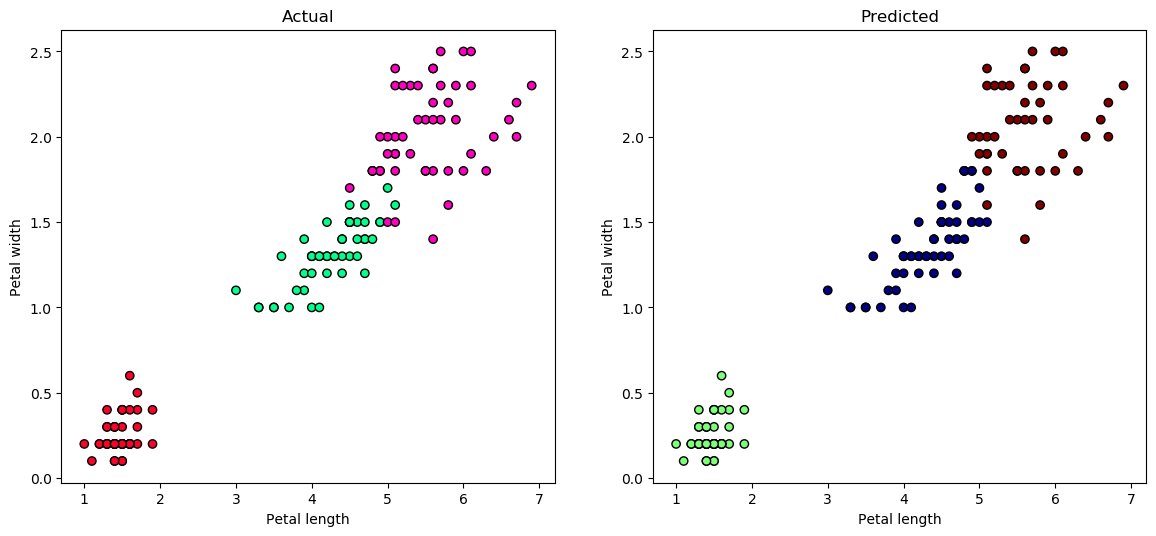

In [17]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

TODO:

- Sự phân cụm dữ liệu rõ rệt chỉ lẫn lộn vài điểm dữ liệu


In [18]:
E=X[:,0:]
model=k_medoids(k=3)
centers = model.fit(E)
print(centers)

[[5.7 2.8 4.1 1.3]
 [6.5 3.  5.2 2. ]
 [5.  3.4 1.5 0.2]]


Text(0.5, 1.0, 'Predicted')

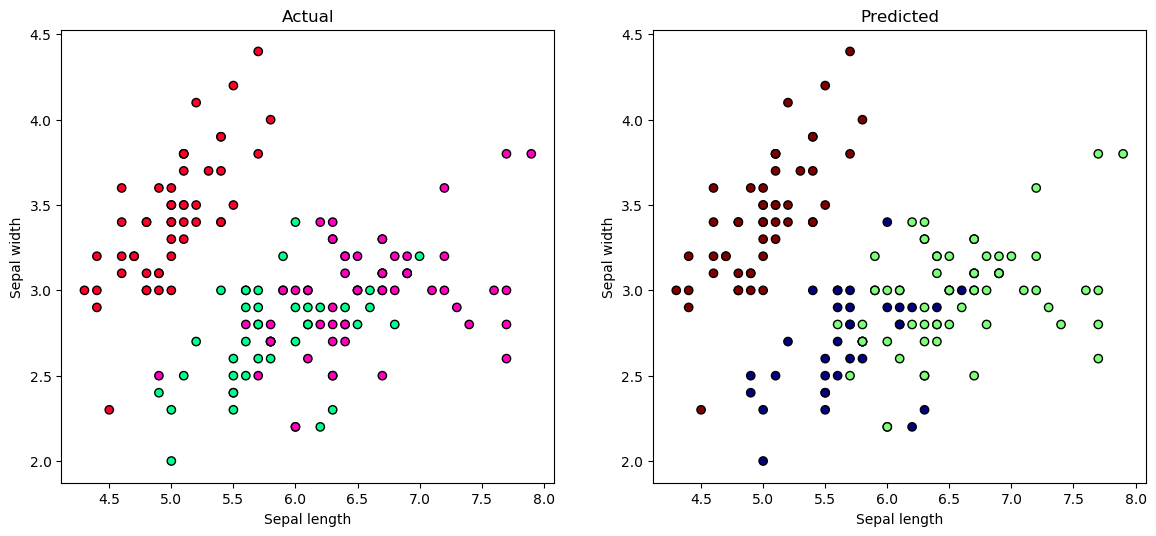

In [19]:
new_labels = model.predict(E)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(E[:, 0], E[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(E[:, 0], E[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[1].set_xlabel('Sepal length')
axes[1].set_ylabel('Sepal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

#### Nhận xét
- Độ chính xác của model giảm vì độ co cụm của dữ liệu Sepal không cao như dữ liệu Petal


**=>>> K-means dự đoán tốt hơn so với K-medoids trên thuộc tính Petal của tập dữ liệu Iris**

#### References:
1. https://en.wikipedia.org/wiki/K-means_clustering
2. http://madhugnadig.com/articles/machine-learning/2017/03/04/implementing-k-means-clustering-from-scratch-in-python.html
3. https://en.wikipedia.org/wiki/K-medoids
4. https://towardsdatascience.com/k-medoids-clustering-on-iris-data-set-1931bf781e05
5. https://github.com/DuXawm22/Titanic-Kaggle-Clustering/blob/master/kmeans_numpy.py
6. https://github.com/shenxudeu/K_Medoids/blob/master/k_medoids.py
